# Decision Trees

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

Trees are recursive data structures
- **Recursion** (To know recursion, you must first know recursion.)


In [1]:
# factorial using recursion
def f(n):
    if n > 0: return n * f(n-1)
    else: return 1
f(3)

## Binary Tree
- Connected nodes - special tree structure
    - There is one **root** node
    - Every node has a maximum of two **children** (left, right)
    - The **leaves** are the **terminal** nodes

In [5]:
class node(object):
    
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
   
    def __repr__(self, i = 0):
        s = ' '*3*i + '➥ ' + repr(self.data) + os.linesep
        if self.left is not None:  
            s += 'L' + self.left.__repr__(i + 1) 
        if self.right: # same thing
            s += 'R' + self.right.__repr__(i + 1) 
        return s

n = node('ada', left = node('bob'), right = node('cec'))
print (n)

➥ 'ada'
L   ➥ 'bob'
R   ➥ 'cec'



In [11]:
root = node(2, 
            node(7,
                 node(2), 
                 node(6, node(5), node(11))),
            node(5, None,
                 node(9, node(4)))
           )
print(root)

➥ 2
L   ➥ 7
L      ➥ 2
R      ➥ 6
L         ➥ 5
R         ➥ 11
R   ➥ 5
R      ➥ 9
L         ➥ 4



## $n$-ary Tree

In [16]:
class node(object):
    
    def __init__(self, data, children=[]):
        self.data = data
        self.children = children
        
    def __repr__(self, i=0):
        s = f"{' '*3*i}➥ {self.data}{os.linesep}" # f-String!
        for child in self.children:
            s += child.__repr__(i + 1)
        return s

In [17]:
# build a tree
root = node(2, [ 
            node(7, [
                node(2),
                node(6, [
                        node(5), 
                        node(11)])]),
            node(5, [
                node(9, [node(4)])])
            ]);

root

➥ 2
   ➥ 7
      ➥ 2
      ➥ 6
         ➥ 5
         ➥ 11
   ➥ 5
      ➥ 9
         ➥ 4

## Trees are everywhere!
- Searching: $k$d-trees, B-tree, R-tree, ball trees, etc...
- Decisions (E.g., for classification)

## $k$-d tree
- Balanced tree, Split along axes

## Decision Trees
- Recursive partitioning of the training dataset
- At a given node with dataset $D$ we look for the best split $\theta = $ (feature $j$, threshold $t$)
    - such that the partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*
    - $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$
- Different impurity functions $H(\cdot)$ (E.g., Gini with $K$ classes in the partition $D$)
    - $\displaystyle H(D) = \sum_{k=1}^K p_k\, (1-p_k)$
    - Or variance for regression


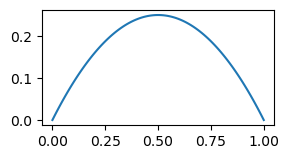

In [19]:
x = np.linspace(0,1,100)
plt.figure(figsize=(3,1.5))
plt.plot(x, x*(1-x));

### Toy Example

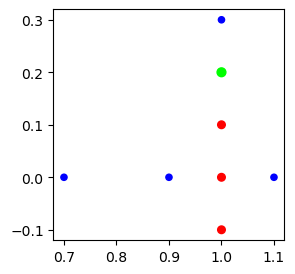

In [7]:
X = np.array([[.7,0],[1,.3],[1.1,0],[.9,0], 
              [1,0],[1,-.1],[1,.1], 
              [1,.2]], 
             dtype=np.float32)
c = np.array([ 0,0,0,0, 1,1,1, 2], dtype=np.float32)
plt.figure(figsize=(3,3))
plt.subplot(111,aspect='equal')
plt.scatter(X[:,0],X[:,1],c=c, s=20+10*c,cmap=plt.cm.brg);

### Gini impurity of a partition
- We have 3 classes total hence the sum for the entire dataset is
- $\displaystyle H = \frac{4}{8}\left(1\!-\!\frac{4}{8}\right) + \frac{3}{8}\left(1\!-\!\frac{3}{8}\right) + \frac{1}{8}\left(1\!-\!\frac{1}{8}\right) $ = $ \displaystyle = \frac{16}{64}  + \frac{15}{64}+ \frac{7}{64}= \frac{19}{32} = 0.59375$
- This is the root of the tree

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X,c)

print ('number of samples per node:', clf.tree_.n_node_samples)
print ('Impurity:', clf.tree_.impurity)
print ('Feature:', clf.tree_.feature)
print ('Threshold:', clf.tree_.threshold)

number of samples per node: [8 2 6]
Impurity: [0.59375    0.         0.61111111]
Feature: [ 0 -2 -2]
Threshold: [ 0.94999999 -2.         -2.        ]


### Impurity of 2 partitions after first split

- The root partition contains 3 classes hence the sum is
    - $ \displaystyle H_{\rm{}left} = \frac{2}{2}\left(1\!-\!\frac{2}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right)= 0$
    - $ \displaystyle H_{\rm{}right} = \frac{3}{6}\left(1\!-\!\frac{3}{6}\right) + \frac{2}{6}\left(1\!-\!\frac{2}{6}\right) + \frac{1}{6}\left(1\!-\!\frac{1}{6}\right) $ 
    - $ \displaystyle = \frac{9}{36} + \frac{8}{36} + \frac{5}{36}= \frac{11}{18} $ $\approx 0.61111111$
- Note importance of weighting by partition sizes!

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,c)

print ('number of samples per node:', clf.tree_.n_node_samples)
print ('Impurity:', clf.tree_.impurity)
print ('Feature:', clf.tree_.feature)
print ('Threshold:', clf.tree_.threshold)

number of samples per node: [8 2 6 4 2]
Impurity: [0.59375    0.         0.61111111 0.375      0.5       ]
Feature: [ 0 -2  1 -2 -2]
Threshold: [ 0.94999999 -2.          0.15       -2.         -2.        ]


### Sci Kit Trees
Use the sklearn routines to 
- Load the iris dataset and use the first 2 features
- Run the decision tree classifier with different depths
- Use cross-validation and plot the results

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2].copy()  # only first 2 features
c = iris.target.copy()      # copy
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

print ('New classes:', np.unique(c))
print ('New data:', X.shape)

New classes: [0 1]
New data: (100, 2)


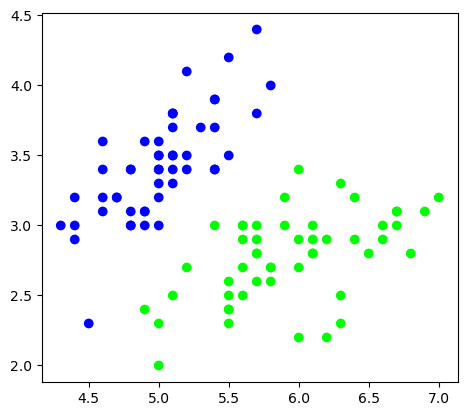

In [13]:
plt.subplot(111,aspect='equal'); 
plt.scatter(X[:,0],X[:,1],c=c,cmap=plt.cm.brg);

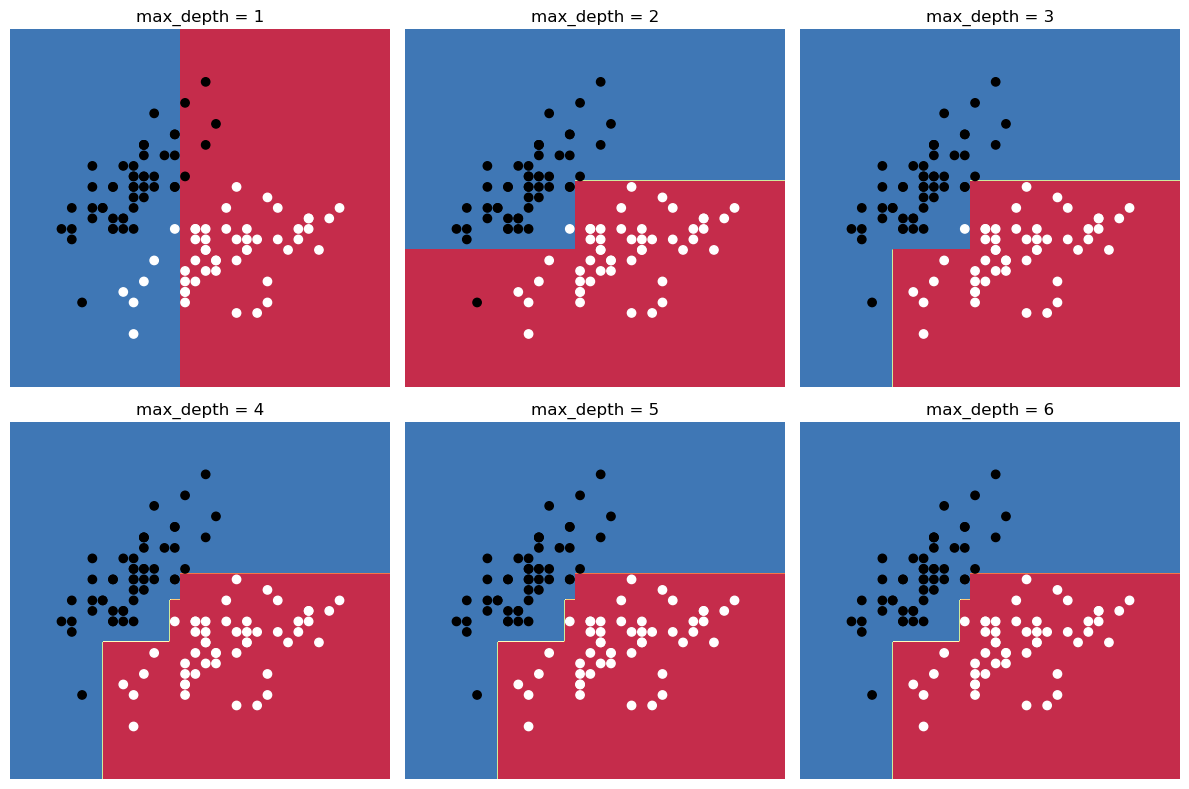

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

# grid of points within the limits
h = 0.01
x, y = np.meshgrid(
    np.arange(X[:,0].min() - .5, X[:,0].max() + .5, h),
    np.arange(X[:,1].min() - .5, X[:,1].max() + .5, h)
)
grid = np.c_[x.ravel(), y.ravel()]

plt.figure(figsize=(12, 8))   # big figure for 2x3 grid

for depth in range(1, 7):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    z = clf.fit(X, c).predict(grid).reshape(x.shape)

    plt.subplot(2, 3, depth)
    plt.contourf(x, y, z, cmap=plt.cm.Spectral_r)
    plt.scatter(X[:,0], X[:,1], c=c, cmap=plt.cm.gray)
    plt.title(f"max_depth = {depth}")
    plt.axis("off")   # optional, makes cleaner

plt.tight_layout()
plt.show()